In [1]:
import gym
import math
import random
import numpy as np
import matplotlib
import pandas as pd

env = gym.make('Marvin-v0')

In [ ]:
# Let's try to gather the data from game samples


num_episodes = 10000
num_steps_per_episode = 1000


traning_data = []
for _ in range(num_episodes):
    prev_observation = env.reset()
    
    for step in range(num_steps_per_episode):        
        # Let's choose a random action
        action = env.action_space.sample()

        # Make your step and collect results
        observation, reward, done, info = env.step(action)
        traning_data.append([prev_observation, action, reward, done])
        prev_observation = observation
        if done == True:
            break 
    

data = pd.DataFrame(traning_data, columns=['Observation', 'Action', 'Reward', 'Done'])
# data.to_csv('./walking-marvin.csv')

In [58]:
# Piece of code to read the data from csv file
data = pd.read_csv('./walking-marvin.csv', header=0, usecols=['Observation', 'Action', 'Reward'], \
                   nrows = 10, dtype={ 'Action': np.ndarray(shape=(4,), dtype=str), 'Reward': np.float64})
print(data["Action"])

-


412394
412394


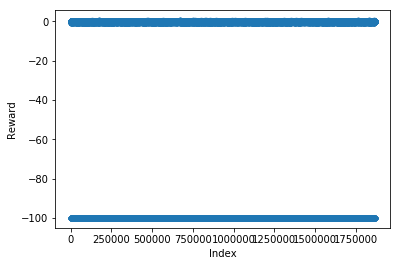

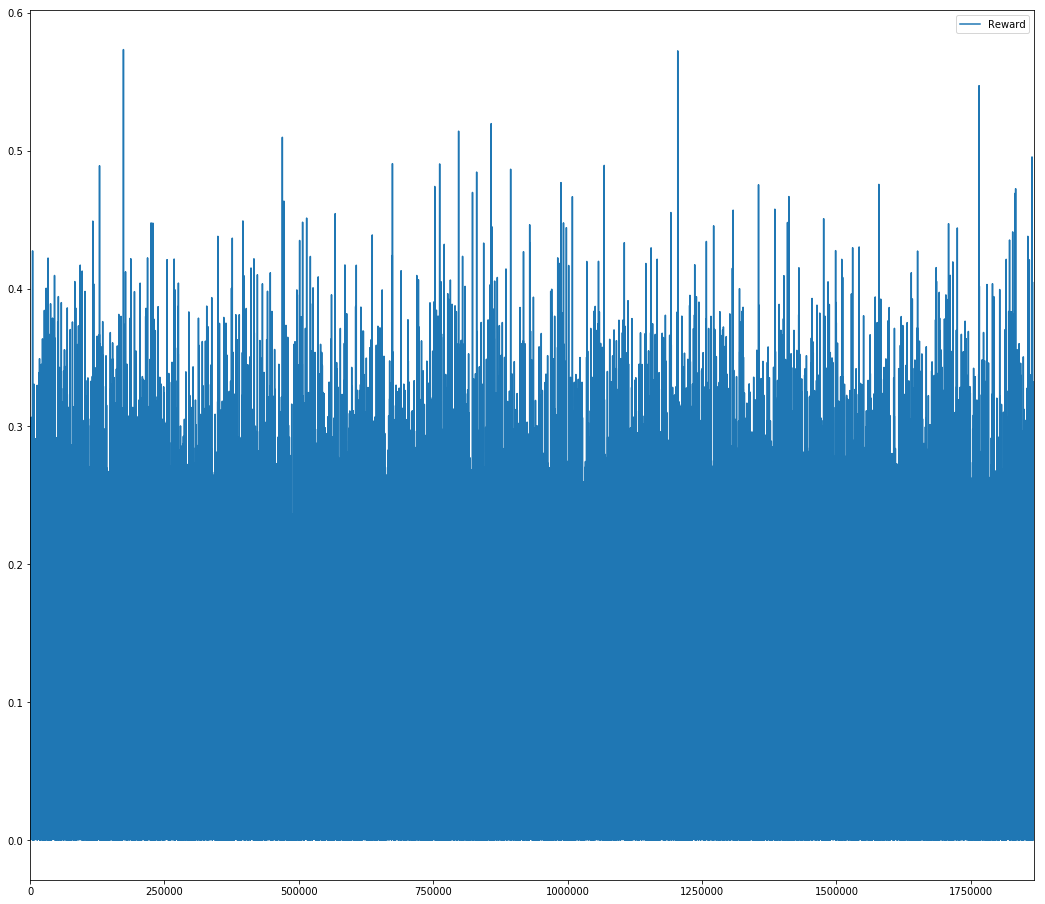

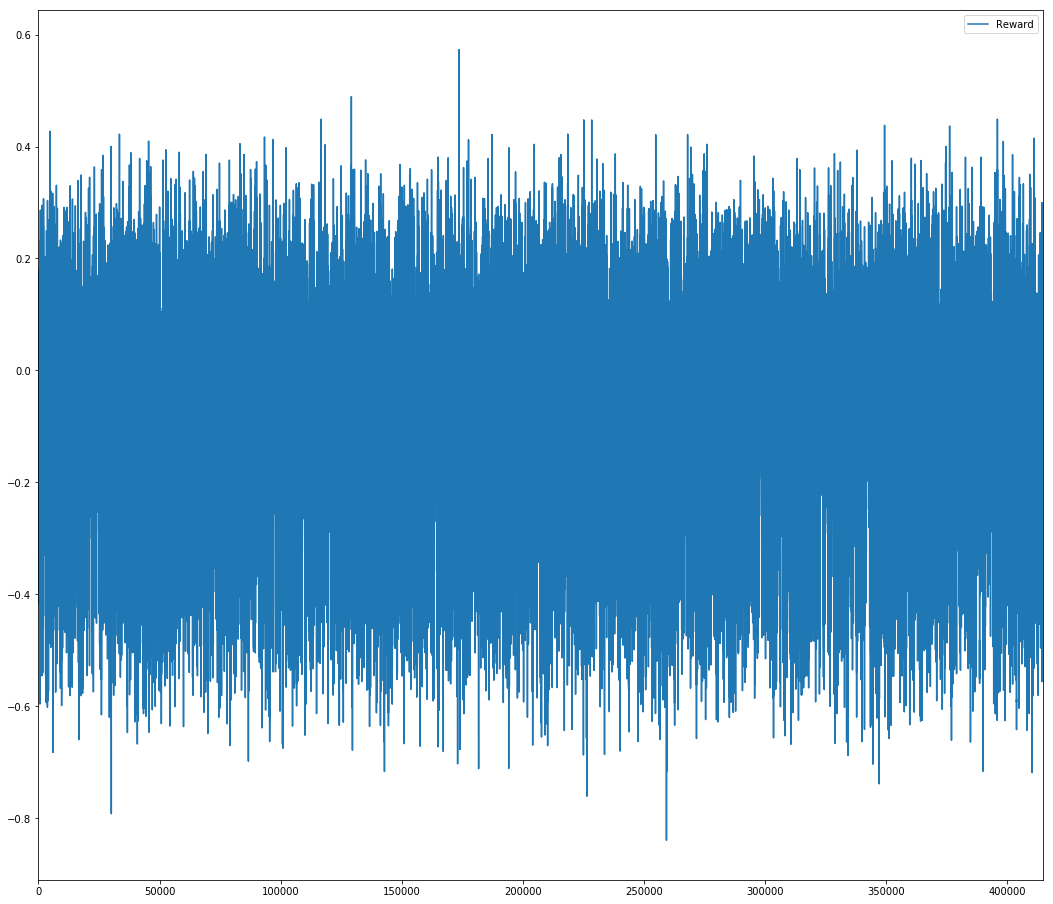

In [5]:
# Let's try to explore the data we gath


data.plot.scatter(x='Index', y='Reward')
print(len(data[data['Reward'] > 0]))
print(len(data[data['Reward'] < 0].head(412394)))

positiveRewards = data[data['Reward'] > 0]
negativeRewards = data[data['Reward'] != -100].head(412394)

positiveRewards.plot(y='Reward', figsize=(18, 16))
negativeRewards.plot(y='Reward', figsize=(18, 16))

 I want to create the neuronNetwork that will take an observation of a enviroment (24 dimensional vector) and returns
 me an action (4 dimensional vector) I then send this action to env.step and receive a reward. Somehow i need to update
 the weights of my network using the reward. My reward should be as big as possible. (1 - reward) is my error? 
 Looks like so. 
 I need three layers of neurons. each neuron has a weight property, activation function, function to update the weight
 Each layer consist of several neurons. I need to use the weight inside the neuron. so layers just run neurons commands
 and play as a coordinator.




In [22]:
def mult_and_sum(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result


class Neuron(object):
    def __init__(self, input_counts = 1, activation_function = math.tanh, weights = None,
                update_function=None, learning_rate = 0.001, input_layer = False, value = None):
        self.input_layer = input_layer
        if self.input_layer == False:
            self.weights = [random.uniform(-1, 1)] * input_counts if weights == None else weights
            print(self.weights)
        self.value = value
        self.activation_function = activation_function
        self.update_function = self.update_weights if update_function == None else update_function
        self.learning_rate = learning_rate
    
    def setValue(self, value):
        self.value = value
        

    def __str__(self):
        message = "\n--------------\nself.weights: {}\nself.value: {}\n--------------\n"
        if (self.input_layer):
            message = "\n--------------\ninput layer: True\nself.value: {}\n--------------\n"
            return message.format(self.value)
        return message.format(self.weights, self.value)
    
        
    def activate(self, inputs = None):
        if (self.input_layer):
            return self.value
        self.setValue(self.activation_function(mult_and_sum(inputs, self.weights)))
        return self.value
    
    def update_weights(self, inp, update):
        # I should update the weight only if the reward is bigger? 
        errors = self.learning_rate * (update - self.activate(inp))
        self.weights = np.add(self.weights, np.multiply(inp, errors))
    
        


In [23]:
def linear_classifiyer(x):
    return x

class Layer(object):
    def __init__(self, neuron_count, input_counts = 1, neuron_weights = None,
                 activation_function = linear_classifiyer):
        random.seed()
        self.neurons = []
        self.input_layer = True if input_counts == 1 else False
        
        for _ in range(neuron_count):
            if (neuron_weights != None):
                self.neurons.append(Neuron(input_counts, input_layer = self.input_layer, weights = neuron_weights))
            else:
                self.neurons.append(Neuron(input_counts, input_layer = self.input_layer))
    
    def setValues(self, inputs):
        for index, neuron in enumerate(self.neurons):
            neuron.setValue(inputs[index])
    
    
    def __str__(self):
        message = "[input_layer: {},\nneurons: {}]"
        return message.format(self.input_layer, len(self.neurons))

    def update(self, inputs, reward):
        if (self.input_layer):
            return 
        for neuron in self.neurons:
            neuron.update_weights(inputs, reward)
    
    def output(self, inputs = None):
        layer_output = []
        for neuron in self.neurons:
            layer_output.append(neuron.activate(inputs))
        return layer_output
            
    


In [24]:
# I want to give list of lists and create all layers with all neurons.
# I should be able to use the weights inside the list of lists
# Need an example of weights
# 24 input -> 16 -> 8 -> 4 (output)

# First layer -> no weights
# Second Layer -> 16 neurons each has 24 inputs and 24 weights. 
# third layer -> 8 neurons each has 16 inputs and 16 weights.
# layer #4 -> 4 neurons each has 4 inputs and 4 weights.

#Example

# [
#  [ [w1, w2, w3, ..., ], [], [], ... , []  ] # second layer consist from 16 arrays of weights. each has length == 24 
#  [ [w1, w2, w3, ..., ], [], [], ... , []  ] # third layer and etc...
# ]


In [25]:


class Brain(object):
    def __init__(self, input_counts, weights):
        self.layers = []
        self.input_layer = Layer(neuron_count = input_counts)
        self.layers.append(self.input_layer)
        for layer in weights:
            self.layers.append( Layer(neuron_count = len(layer), input_counts = len(layer[0]),
                                      neuron_weights = layer, activation_function = math.tanh))
        
    def __str__(self):
        message = "\n\nlayers: {}\ninput_counts: {},\noutput_counts: {},\nhidden_layers: {}\n\n"
        return message.format(len(self.layers),
                              len(self.layers[0].neurons),
                              len(self.layers[-1].neurons),
                              len(self.layers) - 2)
    
    def generate_action(self, data):
        self.input_layer.setValues(data)
        inputs  = self.input_layer.output()
        for hidden_layer in self.layers[1: -1]:
            inputs = hidden_layer.output(inputs)
        return self.output_layer.output(inputs)
    
    def learn(self, observation, action, reward):
        data = np.concatenate((observation, action), axis=None)
        self.input_layer.setValues(data)
        layer_input = self.input_layer.output()
        for layer in self.layers[1:]:
            layer.update(layer_input, reward)
            layer_input = layer.output(layer_input)

In [51]:
weights = [
    [[0.111, 0.111, 0.111, 0.111], [0.222,0.222,0.222,0.222], [0.333, 0.333, 0.333, 0.333], [0.444,0.444,0.444,0.444]],
    [[0.111, 0.111, 0.111, 0.111], [0.222,0.222,0.222,0.222], [0.333, 0.333, 0.333, 0.333], [0.444,0.444,0.444,0.444]],
    [[0.111, 0.111, 0.111, 0.111], [0.222,0.222,0.222,0.222]],
    [[0.111, 0.111]]
]

schema = [
    [[4],[4],[4],[4]],
    [[4],[4],[4],[4]],
    [[4],[4]],
    [[2]]
]

def initializeRandomWeights(schema):
    weights = []
    for layer in schema:
        neurons = []
        for neuron in layer:
            neuront = []
            for k in range(neuron[0]):
                neuront.append(random.uniform(-1, 1))
            neurons.append(neuront)
        weights.append(neurons)
    return weights

def createSchema(layers = 1, neurons = 1):
    schema = []
    layer_len = neurons[0]
    for n in neurons:
        layer = []
        
        for _ in range(n):
            layer.append([layer_len])
        layer_len = len(layer)
        schema.append(layer)
    return schema


[[[4], [4], [4], [4]], [[4], [4], [4], [4]], [[4], [4]], [[2]]]
[[[4], [4], [4], [4]], [[4], [4], [4], [4]], [[4], [4]], [[2]]]


In [53]:
print(N)

[[ 0.22285454 -0.67165042  0.56233636]
 [ 1.16765816 -0.14757619 -1.58376011]
 [-0.11439221  0.6046502   0.18326147]
 [ 1.04122159 -1.78047712  0.16384093]
 [-0.54195316 -1.55000118  0.55592053]
 [-1.05295941 -0.63984623 -0.43818398]
 [ 0.91645066  0.72790155 -1.17313964]
 [-0.32483069 -1.5880685  -0.70353221]
 [-0.51097449 -0.87007728  0.42695632]
 [-0.71759325 -0.16837079  0.64680519]
 [ 0.59199234  1.55645978  1.11737671]
 [ 0.13283691  0.74598294  0.00510295]
 [ 0.19822985  0.33524455  1.40103   ]
 [ 0.52118055  0.47144727 -0.3751224 ]
 [-0.370066    1.03775316  1.67221721]
 [ 0.77440898 -1.74986478  2.24211754]
 [ 0.48150399 -0.51302189  0.42580083]
 [-0.57477139  0.44843851 -0.86047053]
 [ 1.12993954 -0.47199912 -0.10166378]
 [-0.39990262  1.67368481  1.59586576]
 [ 1.90783305  0.39750489 -0.22024295]
 [-0.22616235  0.0735625   1.67746967]
 [ 2.05521063  1.15004966  0.47495725]
 [-1.00492834 -1.29094875  0.40701216]
 [ 2.226982   -0.46932703 -1.18406046]
 [-0.06773347 -0.07071094